In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
import math
import gensim
from gensim.models import Word2Vec
from gensim.models import FastText
from tensorflow.python.framework import ops
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
#data = pd.read_csv("../Sentiment-analysis-cnn/sentiment labelled sentences",dtype=object,na_values=str).values
#df = pd.read_fwf('../Sentiment-analysis-cnn/sentiment labelled sentences/imdb_labelled.txt')
#df.to_csv('train.csv')

In [ ]:
#print(df)

In [ ]:
#print(df.values)

In [ ]:
#x = np.array(df)

In [ ]:
#print(x)

In [ ]:
import csv

In [ ]:
with open('../Sentiment-analysis-cnn/sentiment labelled sentences/imdb_labelled.txt', 'r') as in_file:
    stripped = (line.strip() for line in in_file)
    lines = (line.split('\t') for line in stripped if line)
    with open('train.csv', 'w') as out_file:
        writer = csv.writer(out_file)
        writer.writerow(('Sentence', 'Category'))
        writer.writerows(lines)

In [ ]:
# dataframe = pd.read_csv("../Sentiment-analysis-cnn/sentiment labelled sentences/imdb_labelled.txt",delimiter="\t")
# dataframe.to_csv("NewProcessedDoc.csv", encoding='utf-8', index=False)

In [ ]:
# with open('../Sentiment-analysis-cnn/sentiment labelled sentences/imdb_labelled.txt', "r",newline='') as in_text:
#     in_reader = csv.reader(in_text, dialect='excel-tab')
#     with open('train2.csv', "w") as out_csv:
#         out_writer = csv.writer(out_csv,dialect='excel')
#         for row in in_reader:
#             out_writer.writerow(row)

In [ ]:
# string2 = ';) Recommend with confidence!\t1'
# string = 'how he became the emperor; nothing about where he spend 20 years\t0'
# print(string.strip())
# print(string.strip(';'))

In [ ]:
# print(string.strip().split('\t'))
# print(string.strip(';').split('\t'))

In [ ]:
# import re
# emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
# text = ';) Recommend with confidence!\t1'
# print(emoji_pattern.sub(r'',text))

In [2]:
data = pd.read_csv("train1.csv",dtype=object,na_values=str).values

In [ ]:
print(data.shape)

In [ ]:
print(type(data))

In [ ]:
print(data[0:5])

In [ ]:
print(type(data[0][1]))

In [3]:
x = np.array(data[:,0])
y = np.array((data[:,1]))
y = np.array([int(num) for num in y])

In [4]:
print(type(x[0]))
print(type(y[0]))
print(x.shape)
print(y.shape)

<class 'str'>
<class 'numpy.int64'>
(13662,)
(13662,)


In [5]:
print(x[0:4])

['A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '
 'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '
 'Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.  '
 'Very little music or anything to speak of.  ']


In [6]:
# List of lists of words
words = []
sentences = []
tokenizer = RegexpTokenizer(r'\w+')
i = 0
for sent in x:
    #words.append(sent.split())
    #i = i + 1
    #print(i)
    for word in tokenizer.tokenize(sent):
        words.append(word.lower())
    sentences.append(words)
    words = []

In [7]:
print(sentences[788])
print(type(sentences))
print(len(sentences))

['10', '10']
<class 'list'>
13662


In [8]:
sentences = np.array(sentences)

In [ ]:
model_word2vec = Word2Vec(sentences, size=300, window=15, min_count=0,workers=10,sg=0)
model_word2vec.train(sentences,total_examples=len(sentences),epochs=150)

In [ ]:
print(model_word2vec)
print(model_word2vec['10'])
print(model_word2vec.wv.most_similar("good"))

In [ ]:
model_word2vec.save("Saved_model_word2vec")

In [10]:
model = Word2Vec.load("../Storage/Saved_model_word2vec")
print(model)

Word2Vec(vocab=19865, size=300, alpha=0.025)


In [11]:
print(len([2]))

1


In [12]:
X = []
Y = []
temp = []
for i in range(0,len(sentences)):
    for j in range(0,len(sentences[i])):
        temp.append(model[sentences[i][j]])
    X.append(temp)
    temp = []

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [13]:
print(len(X[0]))

14


In [14]:
max1 = 0
for i in range(0,len(X)):
    if(len(X[i])>max1):
        max1 = len(X[i])
        pos = i
print(max1)
print(pos)
print(len(X[1]))

74
620
18


In [15]:
count = 0
for i in range(0,len(X)):
    if(len(X[i])>64):
        count = count + 1
print(count)

#  Sequence length : Length of each training example
#  Sequence length is varying from 1 to 74, we have to choose a dimension and accordingly all training exapmles would be
#  padded or truncated

2


In [16]:
import keras
from keras.preprocessing.sequence import pad_sequences
X_new = keras.preprocessing.sequence.pad_sequences(sequences=X, maxlen=64, dtype='float32', padding='post', truncating='post', value=0.0)

Using TensorFlow backend.


In [17]:
print(np.shape(X_new))

(13662, 64, 300)


In [18]:
X = X_new

In [19]:
print(y.shape)

(13662,)


In [20]:
Y = tf.keras.utils.to_categorical(y)

In [21]:
print(np.shape(Y))
print(Y[0:9])

(13662, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [22]:
###-----------------------------CNN Model---------------------------###

In [23]:
def create_placeholders(seq_length, embedding_size, n_y):
    
#     Creates the placeholders for the tensorflow session.
    
#     Arguments:
#     n_H0 -- scalar, height of an input image
#     n_W0 -- scalar, width of an input image
#     n_C0 -- scalar, number of channels of the input
#     n_y -- scalar, number of classes
        
#     Returns:
#     X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
#     Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    

    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(dtype = tf.float32, shape=(None,seq_length,embedding_size,1))
    Y = tf.placeholder(dtype = tf.float32, shape=(None,n_y))
    ### END CODE HERE ###
    
    return X, Y

In [24]:
# def initialize_parameters(filter_size,embedding_size,num_filters):
#     # Initializes weight parameters
#     W = tf.get_variable("W",[filter_size,embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
#     return W

def initialize_parameters(filter_sizes,embedding_size,num_filters):
    # Initializes weight parameters
    W1 = tf.get_variable("W1",[filter_sizes[0],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    W2 = tf.get_variable("W2",[filter_sizes[1],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    W3 = tf.get_variable("W3",[filter_sizes[2],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    W4 = tf.get_variable("W4",[filter_sizes[3],embedding_size,1,num_filters],dtype=tf.float32,initializer=tf.contrib.layers.xavier_initializer(seed=0),regularizer = tf.contrib.layers.l2_regularizer(scale=0.1))
    
    parameters = {"W1": W1,
                  "W2": W2,
                  "W3": W3,
                  "W4": W4}
    
    return parameters

In [25]:
# def forward_propagation(X,filter_sizes,embedding_size,num_filters,seq_length):
#     P2 = []
#     for filter_size in filter_sizes:
#         W = initialize_parameters(filter_size,embedding_size,num_filters)
#         Z = tf.nn.conv2d(X,W,strides=[1,1,1,1],padding="SAME")
#         A = tf.nn.relu(Z)
#         P = tf.nn.max_pool(A,ksize=[1,seq_length-filter_size+1,1,1],strides=[1,1,1,1],padding="SAME")
#         P2.append(P)
#     Z2 = tf.contrib.layers.fully_connected(P2,41,activation_fn = None)
#     return Z2

def forward_propagation(X,filter_sizes,embedding_size,num_filters,seq_length,parameters):
    print("X shape:",X.shape)
    #P = []
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    print("W1 shape :",W1.shape)
    print("W2 shape :",W2.shape)
    print("W3 shape :",W3.shape)
    print("W4 shape :",W4.shape)
    #W1 = initialize_parameters(filter_sizes[0],embedding_size,num_filters)
    Z1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding="VALID")
    A1 = tf.nn.relu(Z1)
    P1 = tf.nn.max_pool(A1,ksize=[1,seq_length-filter_sizes[0]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P1)
    print("Z1 shape:",Z1.shape)
    print("P1 shape:",P1.shape)
    #W2 = initialize_parameters(filter_sizes[1],embedding_size,num_filters)
    Z2 = tf.nn.conv2d(X,W2,strides=[1,1,1,1],padding="VALID")
    A2 = tf.nn.relu(Z2)
    P2 = tf.nn.max_pool(A2,ksize=[1,seq_length-filter_sizes[1]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P2)
    print("Z2 shape:",Z2.shape)
    print("P2 shape:",P2.shape)
    
    #W3 = initialize_parameters(filter_sizes[2],embedding_size,num_filters)
    Z3 = tf.nn.conv2d(X,W3,strides=[1,1,1,1],padding="VALID")
    A3 = tf.nn.relu(Z3)
    P3 = tf.nn.max_pool(A3,ksize=[1,seq_length-filter_sizes[2]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P3)
    print("Z3 shape:",Z3.shape)
    print("P3 shape:",P3.shape)
    
    #W4 = initialize_parameters(filter_sizes[3],embedding_size,num_filters)
    Z4 = tf.nn.conv2d(X,W4,strides=[1,1,1,1],padding="VALID")
    A4 = tf.nn.relu(Z4)
    P4 = tf.nn.max_pool(A4,ksize=[1,seq_length-filter_sizes[3]+1,1,1],strides=[1,1,1,1],padding="VALID")
    #P.append(P4)
    print("Z4 shape:",Z4.shape)
    print("P4 shape:",P4.shape)
    #P = np.array(P)
    P = tf.concat([P1,P2,P3,P4],3)
    print("P shape:",P.shape)
    P = tf.contrib.layers.flatten(P)
    print("P shape flattened",P.shape)
    Z5 = tf.contrib.layers.fully_connected(P,2,activation_fn = None)
    print("Z5 shape:",Z5.shape)
    return Z5

In [26]:
def compute_cost(Z5, Y):
    """
    Computes the cost
    
    Arguments:
    Z5 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples,2)
    Y -- "true" labels vector placeholder, same shape as Z5
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z5, labels = Y))
    reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
    reg_constant = 0.01  # Choose an appropriate one.
    loss = cost + reg_constant * sum(reg_losses)
    ### END CODE HERE ###
    
    return loss

In [27]:
def random_mini_batches(X, Y, mini_batch_size, seed = 0):
    np.random.seed(seed)            
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    #print("X shape:",X.shape)
    #print("Y shape",Y.shape)
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    #print("Shuffled X shape",shuffled_X.shape)
    shuffled_Y = Y[permutation,:]#.reshape((2,m))
    #print("Shuffled Y shape",shuffled_Y.shape)
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k*mini_batch_size:(k+1)*mini_batch_size,:]
        mini_batch_Y = shuffled_Y[k*mini_batch_size:(k+1)*mini_batch_size,:]#.reshape((2,m))
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size:m,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches*mini_batch_size:m,:]#.reshape((2,m))
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches


In [37]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.005,
          num_epochs = 50, minibatch_size = 512, print_cost = True):
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    
    # To be used if not using stochastic
    (m, seq_length, embedding_size,nc) = X_train.shape             
    ##-----------------------------------------###
    
    
    ## To be used if using Stochastic ##
#     m = X_train.shape[0]
#     seq_length = X_train.shape[2]
#     embedding_size = X_train.shape[3]
#     nc = X_train.shape[4]
    ##------------------------------------####
    
    
    
    n_y = Y_train.shape[1]            # 2 - stochastic;  1 - otherwise                            
    costs = []                                        # To keep track of the cost
    filter_sizes = [2,4,7,9]
    num_filters = 8
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(seq_length, embedding_size, n_y)

    # Initialize parameters
    parameters = initialize_parameters(filter_sizes,embedding_size,num_filters)
    
    # Forward propagation: Build the forward propagation in the tensorflow graph

    Z5 = forward_propagation(X,filter_sizes,embedding_size,num_filters,seq_length,parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z5, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(0,num_epochs):
            #_, temp_cost = sess.run([optimizer, cost], feed_dict = {X:X_train, Y:Y_train})  #Batch Gradient Descent

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict = {X: minibatch_X, Y: minibatch_Y})     # mini_batch gradieent descent
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
#             stochastic_cost=0    
#             for i in range(0,m):
#                 _, temp_cost = sess.run([optimizer, cost], feed_dict = {X:X_train[i], Y:Y_train[i]}) 
#                 stochastic_cost += temp_cost/m
#                 if(i%10==0):
#                     print("Cost after",i,"iterations =",stochastic_cost)
                
            #Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
#             if print_cost == True and epoch % 5 == 0:
#                 print ("Cost after epoch %i: %f" % (epoch, stochastic_cost))
#             if print_cost == True and epoch % 1 == 0:
#                 costs.append(stochastic_cost)
#             if print_cost == True and epoch % 5 == 0:
#                 print ("Cost after epoch %i: %f" % (epoch, temp_cost))
#             if print_cost == True and epoch % 1 == 0:
#                 costs.append(temp_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        
        # Calculate the correct predictions
        print("Z5 shape:",Z5.shape)
        predict_op = tf.argmax(Z5, 1)
        print("predict_op shape:",predict_op.shape)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y,1))
        print("Correct prediction shape:",correct_prediction.shape)
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print("accuracy shape:",accuracy.shape)
        #accuracy = tf.Print(accuracy, [accuracy], message="Accuracy: ")
        #print(sess.run(accuracy))
#         train_accuracy = accuracy.eval({X: np.squeeze(X_train,axis=1), Y: np.squeeze(Y_train,axis=1)})
#         test_accuracy = accuracy.eval({X: np.squeeze(X_test,axis=1), Y: np.squeeze(Y_test,axis=1)})
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})

        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
        
        #precision = tf.metrics.precision(Y_test,correct_prediction)
        #recall = tf.metrics.recall(Y_test,correct_prediction)
        
        #print("Precision =",precision)
        #print("Recall=",recall)
        
        #F1_score_sklearn = f1_score()
        #F1_score_tf = tf.contrib.metrics.f1_score(Y_test,predictions) 
        #print("F1_score=",F1_score_tf)
                
        #return train_accuracy, test_accuracy, predict_op,parameters
        return predict_op,correct_prediction,parameters,accuracy

In [29]:
print(np.shape(X))
print(np.shape(Y))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

(13662, 64, 300)
(13662, 2)


In [30]:
print(np.shape(X_train))
print(np.shape(Y_train))

(10246, 64, 300)
(10246, 2)


In [31]:
X_train = np.expand_dims(X_train,axis=3)
X_test = np.expand_dims(X_test,axis=3)
#Y_train = np.expand_dims(Y_train,axis=1)
#Y_test = np.expand_dims(Y_test,axis=1)

In [35]:
print(np.shape(X_train))
print(np.shape(Y_train))

(10246, 64, 300, 1)
(10246, 2)


X shape: (?, 64, 300, 1)
W1 shape : (2, 300, 1, 8)
W2 shape : (4, 300, 1, 8)
W3 shape : (7, 300, 1, 8)
W4 shape : (9, 300, 1, 8)
Z1 shape: (?, 63, 1, 8)
P1 shape: (?, 1, 1, 8)
Z2 shape: (?, 61, 1, 8)
P2 shape: (?, 1, 1, 8)
Z3 shape: (?, 58, 1, 8)
P3 shape: (?, 1, 1, 8)
Z4 shape: (?, 56, 1, 8)
P4 shape: (?, 1, 1, 8)
P shape: (?, 1, 1, 32)
P shape flattened (?, 32)
Z5 shape: (?, 2)
Cost after epoch 0: 0.967652
Cost after epoch 5: 0.367252
Cost after epoch 10: 0.355721
Cost after epoch 15: 0.219339
Cost after epoch 20: 0.142253
Cost after epoch 25: 0.110781
Cost after epoch 30: 0.091844
Cost after epoch 35: 0.090321
Cost after epoch 40: 0.501531
Cost after epoch 45: 0.208237


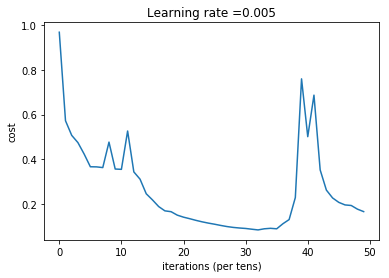

Z5 shape: (?, 2)
predict_op shape: (?,)
Correct prediction shape: (?,)
accuracy shape: ()
Train Accuracy: 0.9997072
Test Accuracy: 0.72336066


In [38]:
predict_op,correct_prediction,parameters,accuracy = model(X_train, Y_train, X_test, Y_test)